# Initialization

## Load Packages

In [1]:
using HalfIntegers
using LinearAlgebra
using ElasticArrays
using JLD2
using Distributed
using DelimitedFiles
using Random
using CSV
using DataFrames
using LsqFit

## Plot style

In [2]:
using Plots
using Plots.PlotMeasures
using LaTeXStrings

# set backend and style
pgfplotsx()
theme(:default)
default(markerstrokewidth = 0, 
        markerstrokealpha = 0, 
        linewidth = 2, 
        #grid=:none,   
        gridlinewidth= 0.5,
        markersize = 5,
        markershape = :circle,
        tickfontsize = 18, 
        size = (900, 600), 
        legendfontsize = 18, 
        guidefontsize=20,
        titlefontsize = 20,
        legend=(0.03,0.98), 
        xticks = 0:10, 
        foreground_color_axis = "black",
        foreground_color_border = "black",
        foreground_color_guide = "darkorange",
        foreground_color_text = "black",
        guidefontcolor = "black", 
        plot_titlefontcolor = "black",
        titlefontcolor = "black", 
        shape=[:circle])
     

## Data

In [27]:
include("../../parameters.jl");

DATA_FOLDER = "../../data";

STORE_FOLDER = "./plots";

## Useful Function 

In [28]:
function Fromj0ToMass(j0_float)
    return round(sqrt(j0_float * immirzi), digits=2)
end

Fromj0ToMass (generic function with 1 method)

In [29]:
function Fromj0Tojpm(j0_float)
    return round(Int64, 2 * (j0_float / (sqrt(6)))) / 2
end

Fromj0Tojpm (generic function with 1 method)

# Computational times

In [4]:
workers = 64
threads = 1
immirzi = 1

comp_times = Matrix(DataFrame(CSV.File("../../immirzi_$(immirzi)_workers_$(workers)_threads_$(threads).csv", header=true)))

11×9 Matrix{Float64}:
   0.527424    0.160523     0.601666  …      0.740166      0.590337
   0.769778    0.413674     1.03189          2.02997       1.54689
   1.95296     1.45757      3.20841         11.2706        8.01062
   4.8663      3.74367      9.70494         56.9977       55.8254
   9.47651     7.2927      25.9461         260.746       292.24
  16.2969     14.5648      60.5096    …    847.952      1031.73
  26.0956     25.7085     124.612         2187.75       2779.24
  42.3847     40.4394     246.5           4763.95       6367.77
  68.8331     65.863      444.717         9351.08      12785.2
 104.162     103.979      753.396        16770.6       23605.2
 158.681     163.031     1217.38      …  27908.6       40245.5

In [ ]:
pl1 = plot(1:11, 
    [comp_times[:,1], comp_times[:,2], comp_times[:,3], comp_times[:,4], comp_times[:,5], comp_times[:,6], comp_times[:,7], comp_times[:,8], comp_times[:,9]],
    label=[L"j_0=1,\,j_{\pm}=0.5" L"j_0=1.5,\,j_{\pm}=0.5" L"j_0=2,\,j_{\pm}=1" L"j_0=2.5,\,j_{\pm}=1" L"j_0=3,\,j_{\pm}=1" L"j_0=3.5,\,j_{\pm}=1.5" L"j_0=4,\,j_{\pm}=1.5" L"j_0=4.5,\,j_{\pm}=2" L"j_0=5,\,j_{\pm}=2"],
    markershape = :circle,    
    yaxis=:log,
    xaxis=:log,
    legend=(0.10,0.97), 
    legendfontsize = 18)
    xticks!([0,1,2,3,4,5,6,7,8,9,10,11], string.([0,1,2,3,4,5,6,7,8,9,10,11]))
    xlabel!(L"\Delta l")
    ylabel!(L"\textrm{seconds}")
    title!(L"\textrm{Computation time of EPRL vertices}")
savefig("./plots/narval_computation_workers_$(workers)_threads_$(threads)_immirzi_$(immirzi).pdf")  

# Amplitude

In [30]:
function AmplitudeAbsSquaredLoad(DATA_FOLDER, j0, jpm, K0, Kpm, alpha, immirzi, T)
    return Matrix(DataFrame(CSV.File("$(DATA_FOLDER)/amplitude_data/j0=$(j0)_jpm=$(jpm)/K0_$(K0)_Kpm_$(Kpm)/immirzi_$(immirzi)/alpha_$(alpha)/amplitude_abs_sq_T_$(T).csv", header=true)))
end

AmplitudeAbsSquaredLoad (generic function with 1 method)

In [33]:
K0 = 0.5
Kpm = 0.5

T = 100

100

In [35]:
for j0_index in angular_spins
    
    j0 = j0_index[1]
    jpm = Fromj0Tojpm(j0)
    m = Fromj0ToMass(j0)
    
    ampls = AmplitudeAbsSquaredLoad(DATA_FOLDER, j0, jpm, K0, Kpm, alpha, immirzi, T)
    
    ampls[:] .= ampls[:] .* 100000000000000000000
    
final_x_tick = 100

pl1 = plot(0:99, 
    [ampls[:, 1] ampls[:, 2] ampls[:, 3] ampls[:, 4] ampls[:, 5] ampls[:, 6] ampls[:, 7] ampls[:, 8] ampls[:, 9] ampls[:, 10] ampls[:, 11]],
    label=["Δl=0" "Δl=1" "Δl=2" "Δl=3" "Δl=4" "Δl=5" "Δl=6" "Δl=7" "Δl=8" "Δl=9" "Δl=10"],
    markershape = :circle,    
    grid=:true,
    xticks = (120, round(final_x_tick, digits=3)),
    legend=(0.05,0.97), 
    #palette = palette([:skyblue, :royalblue2, :blue]),
    palette = palette([:skyblue, :purple], 11),
    legendfontsize = 22)
    xlabel!(L"T")
    title!(L"|W  \, \left(m=%$m, \, \alpha=%$alpha \right) |")
savefig("$(STORE_FOLDER)/W_alpha_$(alpha)_Immirzi_$(immirzi)_j0_$(j0).pdf")
    
end

# Crossing Time

In [36]:
function CrossingTimeLoad(DATA_FOLDER, j0, jpm, K0, Kpm, alpha, immirzi, T)
    return Matrix(DataFrame(CSV.File("$(DATA_FOLDER)/amplitude_data/j0=$(j0)_jpm=$(jpm)/K0_$(K0)_Kpm_$(Kpm)/immirzi_$(immirzi)/alpha_$(alpha)/lifetime_$(T).csv", header=true)))
end

CrossingTimeLoad (generic function with 1 method)

In [39]:
K0 = 0.5
Kpm = 0.5

T = 100

100

In [40]:
crossing_times = Float64[]

for j0_index in angular_spins
    
    j0 = j0_index[1]
    jpm = Fromj0Tojpm(j0)
    m = Fromj0ToMass(j0)
    
    crossing_time = CrossingTimeLoad(DATA_FOLDER, j0, jpm, K0, Kpm, alpha, immirzi, T)
    
    push!(crossing_times, crossing_time[end])
    
end

In [41]:
crossing_times

9-element Vector{Float64}:
  8.541791049283889
 10.310828782871509
  8.500310447569099
 10.014545981453715
 10.978348786093283
 11.751789597139654
 12.566372635024987
 13.328648817270349
 14.049629462081183

In [42]:
alpha

3

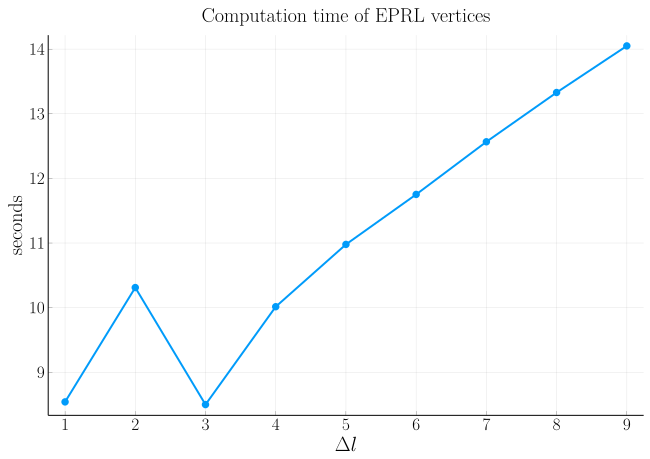

In [43]:
pl1 = plot(1:9, 
        [crossing_times[:]],
    label="",
    markershape = :circle,    
    legend=(0.10,0.97), 
    legendfontsize = 18)
    xlabel!(L"\Delta l")
    ylabel!(L"\textrm{seconds}")
   title!(L"\textrm{Computation time of EPRL vertices}")
#savefig("$(STORE_FOLDER)/Crossing_Time_Immirzi_$(immirzi)_j0_$(j0).pdf")